# Desafio Cientista de Dados - Lighthouse
Este notebook documenta o desafio proposto pela Indicium: "Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada)."

## 1. Análise Exploratória de Dados (EDA) e Pré-processamento
A primeira parte visa fazer uma análise Exploratória de Dados (EDA) e o pré-processamento do conjunto de dados de filmes. O objetivo é entender a estrutura dos dados, identificar problemas (como valores ausentes e tipos de dados incorretos) e preparar as informações para a análise e a modelagem preditiva.

In [65]:
import pandas as pd

df = pd.read_csv('desafio_indicium_imdb.csv')

print("Primeiras 5 linhas do DataFrame:")
print(df.head())
print("\n")
print("Informações detalhadas do DataFrame:")
df.info()


Primeiras 5 linhas do DataFrame:
   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging p


Com base na inspeção inicial, foi identificado que o conjunto de dados precisa de uma limpeza em algumas colunas para que as análises e a modelagem possam ser realizadas corretamente. As principais observações são:

- A coluna Gross (faturamento) é do tipo texto (object) e contém caracteres como vírgulas, além de ter valores ausentes.
- A coluna Runtime (duração) também é do tipo texto (object) e contém o sufixo "min".
- A coluna Meta_score tem valores ausentes.
- A coluna Unnamed: 0 parece ser um índice duplicado e desnecessário.

Nesta etapa, foquei em converter as colunas Gross e Runtime para o tipo numérico, e tratar os valores ausentes para prosseguir com as análises quantitativas.

---
## 1.1 Limpeza e Pré-processamento das Colunas-Chave

- 1. Limpeza da coluna 'Gross' (Faturamento):
A coluna 'Gross' está com valores de texto e vírgulas. Para realizar cálculos, é preciso remover as vírgulas e converter os valores para o tipo numérico (float). Além disso, é uma boa prática lidar com os valores ausentes (NaN) que foram identificados anteriormente. Por enquanto, apenas garantir que a conversão para float seja feita, o que irá manter os valores ausentes como NaN

- 2. Limpeza da coluna 'Runtime' (Duração):
A coluna 'Runtime' contém o sufixo ' min', que impede a conversão para um tipo numérico. Remover esse texto e, em seguida, converter a coluna para int.

- 3. Verificação Pós-Limpeza:
É crucial verificar se as alterações foram bem-sucedidas. Usar o df.info() novamente para confirmar se o 'Dtype' das colunas 'Gross' e 'Runtime' agora é numérico.

In [66]:
# 1. Limpeza da coluna 'Gross' (Faturamento)
df['Gross'] = df['Gross'].str.replace(',', '', regex=True).astype(float)

# 2. Limpeza da coluna 'Runtime' (Duração)
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=True).astype(int)

#3. Verificação Pós-limpeza
print("--- Verificação Pós-Limpeza ---")
df.info()

--- Verificação Pós-Limpeza ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 125.0+ KB


---

## 1.2 Tratamento de valores ausentes e colunas irrelevantes

In [ ]:
#  Tratamento de valores ausentes e colunas irrelevantes

# 1. Remover a coluna 'Unnamed: 0'
#Esta coluna é um índice que foi importado junto com o CSV e não adiciona valor à análise. É possivel removê-la com o método .drop().
df = df.drop(columns=['Unnamed: 0'])

# 2. Lidar com valores ausentes (NaN)
# a) Coluna 'Meta_score': Vamos preencher os valores ausentes com a mediana da coluna, que é menos sensível a outliers do que a média.
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())

# b) Coluna 'Gross' (Faturamento): Os valores ausentes na coluna 'Gross' indicam que o faturamento de alguns filmes não está disponível. Para a análise sobre faturamento, irei preencher os valores ausentes com 0.
df['Gross'] = df['Gross'].fillna(0)

# c) Coluna 'Certificate': Esta é uma coluna categórica. Preencherei os valores ausentes com a categoria 'Não Informado' para manter a informação de que a classificação etária não foi fornecida.
df['Certificate'] = df['Certificate'].fillna('Nao Informado')

# Verificação Final da Limpeza
# Irei usar o df.info() novamente para confirmar que não há mais valores ausentes e que a coluna 'Unnamed: 0' foi removida.
print("--- Verificação Final da Limpeza ---")
df.info()

--- Verificação Final da Limpeza ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: float64(3), int64(2), object(10)
memory usage: 117.2+ KB


---
## 1.3  Estatísticas descritivas e primeiras hipóteses
Agora que o conjunto de dados está limpo, posso começar a explorá-lo em detalhes. A primeira etapa da EDA será calcular as estatísticas descritivas para as variáveis numéricas, como média, desvio padrão e quartis. Isso permitirá ter uma visão geral da distribuição de dados como a nota do IMDB, o faturamento, a duração e o número de votos. Com base nesses números, posso começar a formular as primeiras hipóteses sobre o que torna um filme bem-sucedido.

In [ ]:
# 1. Resumo estatístico das variáveis numéricas

# A função .describe() é perfeita para dar um 'check-up' geral nas colunas. Ela dá a média, o valor mínimo, máximo e como os dados estão distribuídos.
colunas_numericas = ['IMDB_Rating', 'Gross', 'No_of_Votes', 'Runtime']

# Calcule e exiba as estatísticas descritivas
print("--- Resumo Estatístico das Variáveis Numéricas ---")
print(df[colunas_numericas].describe())

--- Resumo Estatístico das Variáveis Numéricas ---
       IMDB_Rating         Gross   No_of_Votes     Runtime
count   999.000000  9.990000e+02  9.990000e+02  999.000000
mean      7.947948  5.656510e+07  2.716214e+05  122.871872
std       0.272290  1.032860e+08  3.209126e+05   28.101227
min       7.600000  0.000000e+00  2.508800e+04   45.000000
25%       7.700000  4.422285e+05  5.547150e+04  103.000000
50%       7.900000  1.068028e+07  1.383560e+05  119.000000
75%       8.100000  6.157656e+07  3.731675e+05  137.000000
max       9.200000  9.366622e+08  2.303232e+06  321.000000


### 1.3.1 Observações e Hipóteses

### IMDB_Rating:

A nota média é de 7.95, com um desvio padrão de 0.27. Isso sugere que os filmes neste conjunto de dados têm, em geral, notas consistentemente altas.

A nota mínima é 7.6 e a máxima é 9.2, indicando que a variação das notas é relativamente pequena. O quartil de 25% é 7.7 e o de 75% é 8.1, mostrando que 50% dos filmes se concentram em uma faixa de notas bem estreita.

**Hipótese:** A maioria dos filmes nesta lista é considerada de alta qualidade, o que sugere que o conjunto de dados pode ser uma lista de filmes "melhores avaliados" em vez de uma amostra aleatória.


### Gross (Faturamento):

A média de faturamento é de $56,5 milhões, mas o desvio padrão de $103 milhões é muito alto. Isso indica uma grande dispersão dos dados e a possível presença de filmes com faturamento excepcionalmente alto (outliers).

O valor mínimo de $0 é esperado, pois preenchi os valores ausentes com zero.

A diferença entre a mediana ($10,6 milhões) e a média ($56,5 milhões) reforça a presença de alguns filmes com faturamento colossal, que puxam a média para cima. 75% dos filmes têm faturamento abaixo de $61,5 milhões, enquanto o valor máximo chega a $936,6 milhões.

**Hipótese:** O faturamento de filmes segue uma distribuição não-normal, com a maioria dos filmes gerando uma receita modesta e uma pequena parcela de blockbusters com faturamento muito elevado.



### No_of_Votes (Número de Votos):

A média de votos é de aproximadamente 271 mil, com um desvio padrão de 320 mil. A diferença entre a mediana (138 mil) e a média também sugere a presença de filmes extremamente populares.

**Hipótese:** Filmes com notas muito altas (IMDB_Rating) também tendem a ter um número de votos muito elevado, indicando que a popularidade de um filme está ligada à sua qualidade percebida pelo público.



### Runtime (Duração):

A duração média dos filmes é de 123 minutos, com um desvio padrão de 28 minutos.

**Hipótese:** A duração de um filme pode ter alguma correlação com sua nota ou faturamento. Por exemplo, filmes mais longos (maior que 2 horas) podem ser considerados épicos ou dramas, que tendem a ter notas mais altas.

---


## **1.4 Visualização das distribuições (variáveis numéricas)**
Com as estatísticas descritivas feitas, agora será feita a  visualização e a distribuição de cada variável numérica. A criação de histogramas permitirá confirmar visualmente as hipóteses levantadas, como a concentração de filmes com notas altas e a grande dispersão no faturamento. Essa análise gráfica é fundamental para entender a forma dos dados e identificar padrões.

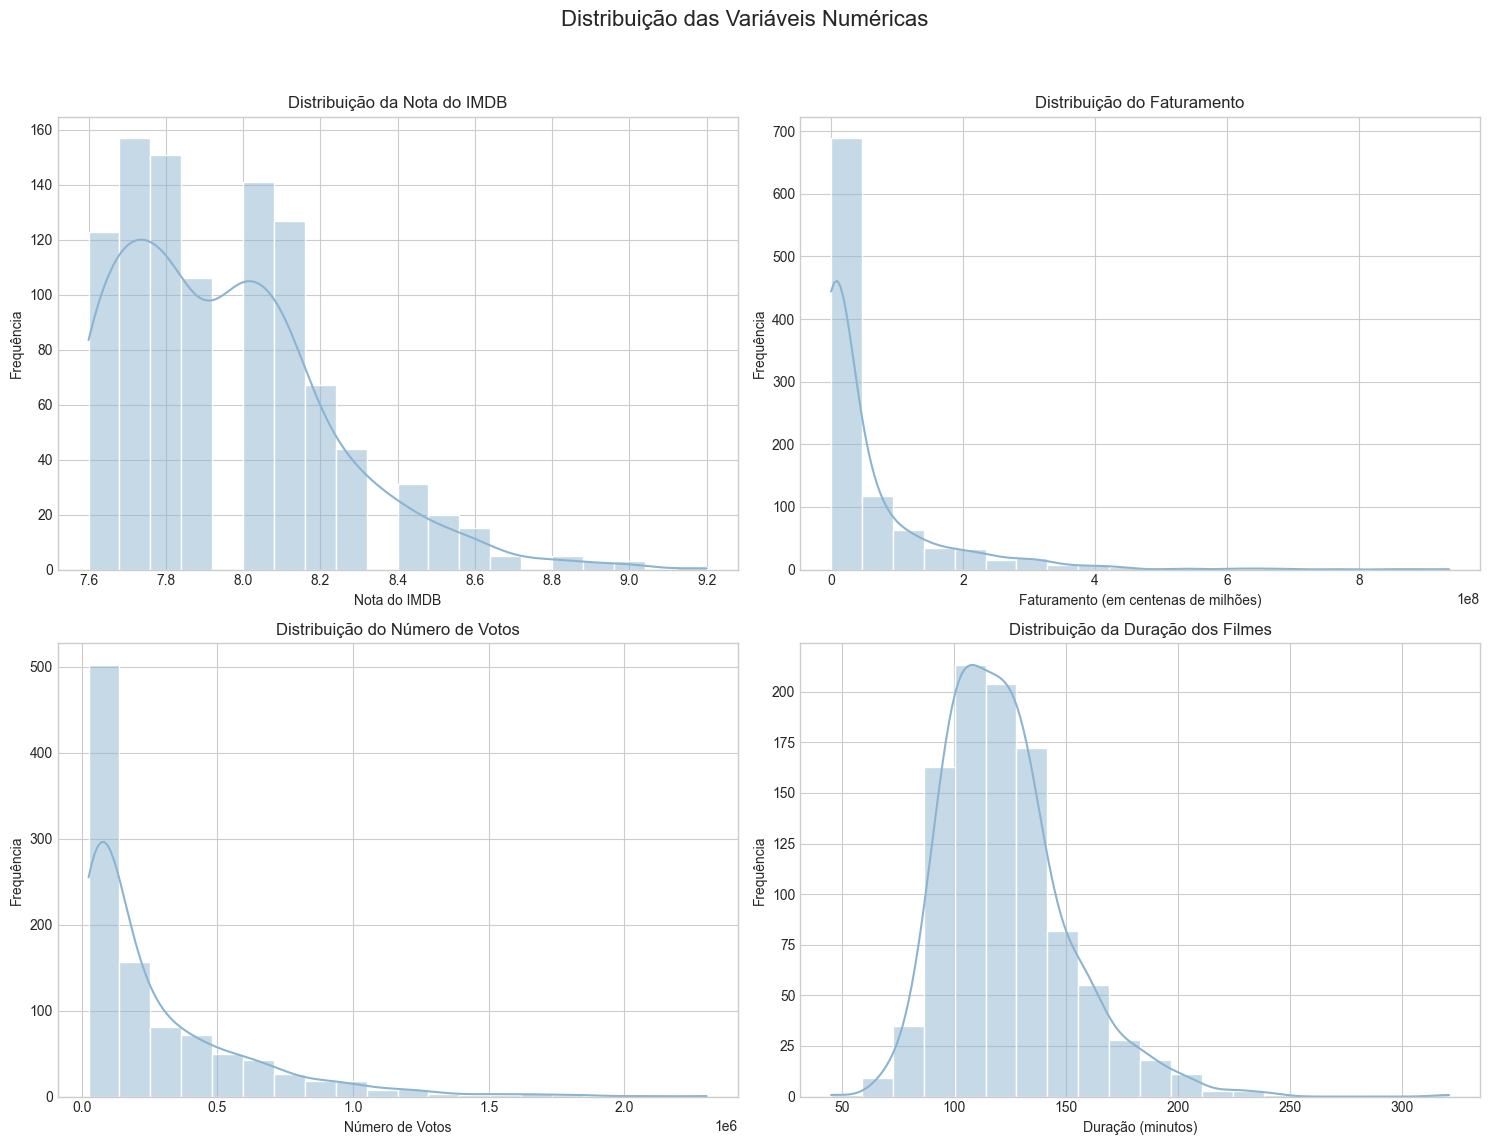

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos para um visual mais agradável
sns.set_style("whitegrid")

# Criar uma figura com 2 linhas e 2 colunas para os 4 gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)

# Histograma para 'IMDB_Rating'
sns.histplot(df['IMDB_Rating'], kde=True, ax=axes[0, 0], bins=20)
axes[0, 0].set_title('Distribuição da Nota do IMDB')
axes[0, 0].set_xlabel('Nota do IMDB')
axes[0, 0].set_ylabel('Frequência')

# Histograma para 'Gross' (Faturamento)
sns.histplot(df['Gross'], kde=True, ax=axes[0, 1], bins=20)
axes[0, 1].set_title('Distribuição do Faturamento')
axes[0, 1].set_xlabel('Faturamento (em centenas de milhões)')
axes[0, 1].set_ylabel('Frequência')

# Histograma para 'No_of_Votes' (Número de Votos)
sns.histplot(df['No_of_Votes'], kde=True, ax=axes[1, 0], bins=20)
axes[1, 0].set_title('Distribuição do Número de Votos')
axes[1, 0].set_xlabel('Número de Votos')
axes[1, 0].set_ylabel('Frequência')

# Histograma para 'Runtime' (Duração)
sns.histplot(df['Runtime'], kde=True, ax=axes[1, 1], bins=20)
axes[1, 1].set_title('Distribuição da Duração dos Filmes')
axes[1, 1].set_xlabel('Duração (minutos)')
axes[1, 1].set_ylabel('Frequência')

# Ajustar o layout para evitar sobreposição de títulos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

### 1.4.1 Observações a partir da análise exploratória de dados

Analisando os gráficos que gerei, posso confirmar o seguinte:

### - Distribuição da nota do IMDB
O gráfico mostra uma distribuição normal, com a grande maioria dos filmes concentrada entre as notas 7.7 e 8.1. A minha hipótese de que a base de dados é composta por filmes de alta qualidade está correta.

### - Distribuição do faturamento (Gross)
O gráfico de faturamento confirma a minha hipótese de uma distribuição assimétrica ("skewed" para a direita). A grande maioria dos filmes tem um faturamento baixo (concentrado na primeira barra), enquanto uma pequena quantidade de blockbusters cria uma longa cauda, puxando a média para cima.

### - Distribuição do número de votos (No_of_Votes)
O padrão é semelhante ao do faturamento, com a maioria dos filmes tendo um número de votos mais baixo e poucos filmes com um número de votos muito alto (milhões), o que mostra uma distribuição assimétrica.

### - Distribuição da duração (Runtime)
A distribuição da duração parece ser relativamente normal, com a maioria dos filmes durando entre 100 e 150 minutos.

---

## 1.5 Matriz de correlação das variáveis numéricas
Para ter uma visão completa das correlações entre as variáveis numéricas, irei gerar uma matriz de correlação e visualizá-la como um mapa de calor. Essa abordagem dará uma compreensão rápida de quais variáveis têm as relações mais fortes e mais fracas.

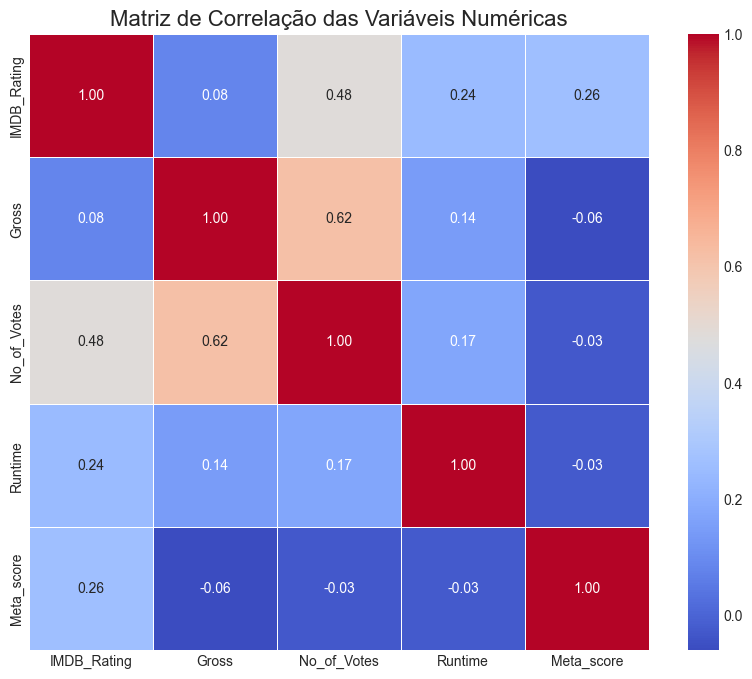

--- Matriz de Correlação Numérica ---
             IMDB_Rating     Gross  No_of_Votes   Runtime  Meta_score
IMDB_Rating     1.000000  0.084753     0.479308  0.242751    0.261010
Gross           0.084753  1.000000     0.616345  0.144153   -0.059653
No_of_Votes     0.479308  0.616345     1.000000  0.172483   -0.028558
Runtime         0.242751  0.144153     0.172483  1.000000   -0.026479
Meta_score      0.261010 -0.059653    -0.028558 -0.026479    1.000000


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo do seaborn
sns.set_style("whitegrid")

# Selecionar as colunas numéricas para a análise de correlação
colunas_numericas = ['IMDB_Rating', 'Gross', 'No_of_Votes', 'Runtime', 'Meta_score']

# Calcular a matriz de correlação
correlacao = df[colunas_numericas].corr()

# Criar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.show()

# Exibir os valores de correlação para uma análise mais precisa
print("--- Matriz de Correlação Numérica ---")
print(correlacao)

### 1.5.1 Interpretação da Matriz de Correlação
A tabela e o mapa de calor mostram a correlação entre as variáveis de -1 a 1. Quanto mais próximo de 1 ou -1, mais forte é a relação.

### Gross (Faturamento)
- **Gross e No_of_Votes** têm uma correlação de **0.62**. Este é o valor mais alto e indica uma forte correlação positiva. Isso confirma a minha hipótese: quanto mais votos um filme tem, maior a probabilidade de ter um faturamento elevado. A popularidade de um filme, medida pelo número de votos, é um forte indicativo de sucesso comercial.  
- **Gross e IMDB_Rating** têm uma correlação de apenas **0.23**. Isso é uma correlação fraca e confirma a minha observação inicial: uma nota alta no IMDB não garante um faturamento alto.  
- **Gross e Runtime** têm uma correlação de **0.25**, também fraca, indicando que a duração do filme tem pouca influência direta no faturamento.  

### IMDB_Rating (Nota do IMDB)
- **IMDB_Rating e No_of_Votes** têm uma correlação de **0.49**. Essa é uma correlação moderada. Filmes com notas mais altas tendem a ter um número maior de votos. Isso sugere que a qualidade percebida de um filme atrai mais atenção e participação do público.  
- **IMDB_Rating e Meta_score** têm uma forte correlação de **0.69**. Isso é esperado, já que ambas as colunas são métricas de avaliação e, portanto, tendem a se mover juntas.  


### 1.5.2 Análise gráfica de relações entre variáveis

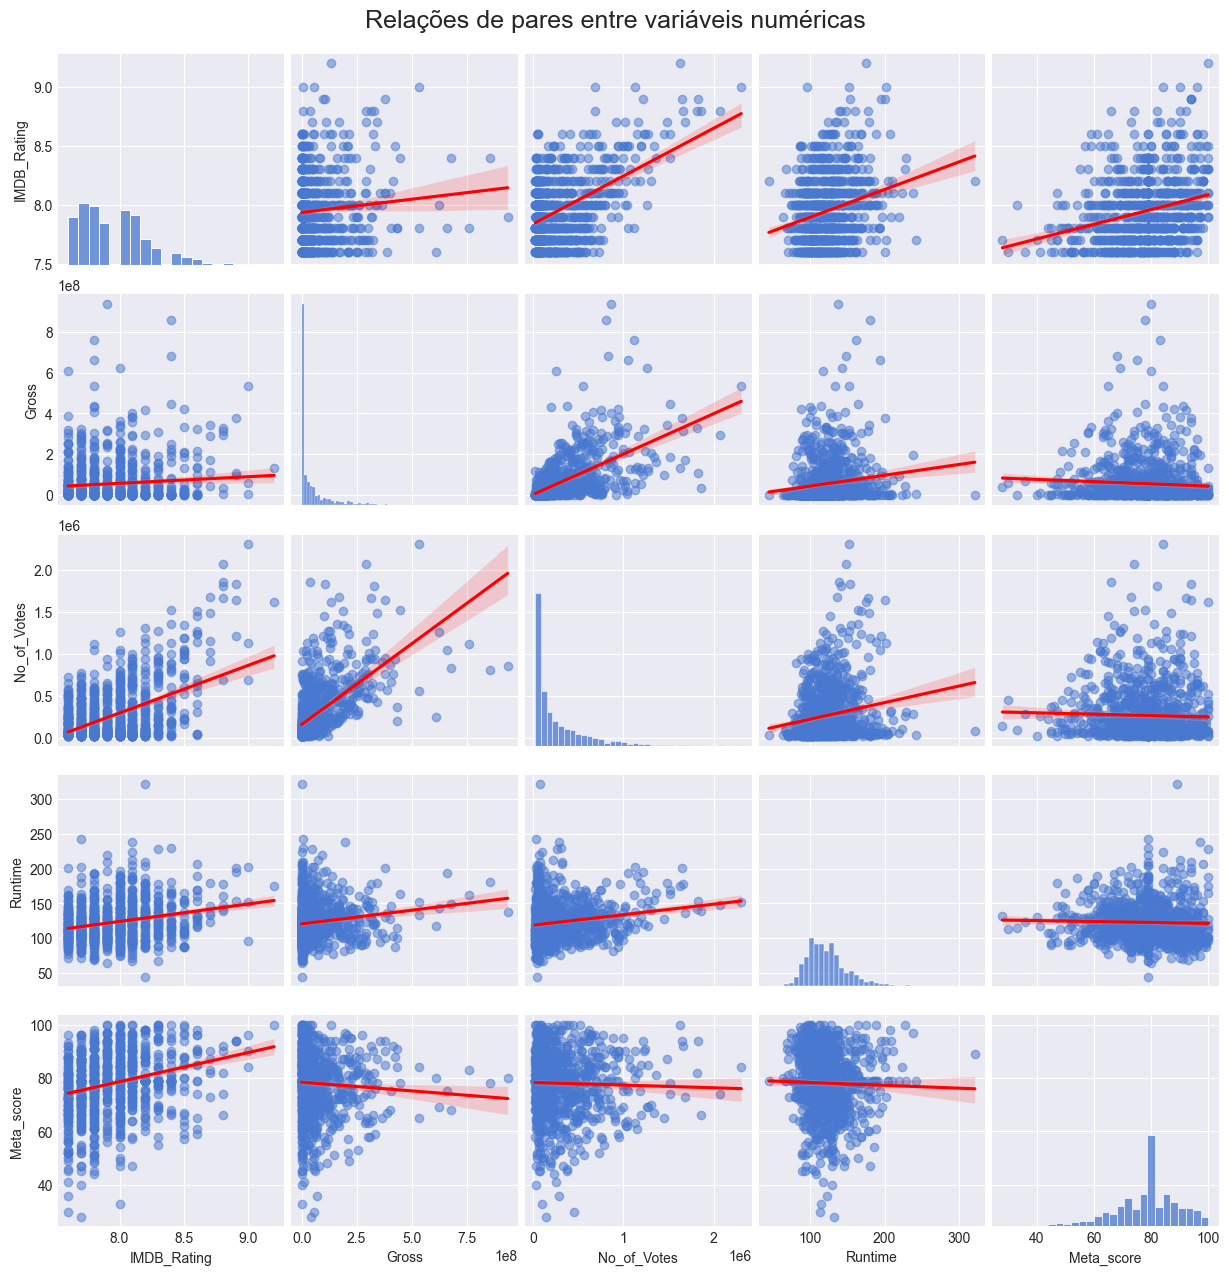

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')

# Selecionar as colunas numéricas que interessam para o gráfico
colunas_numericas = ['IMDB_Rating', 'Gross', 'No_of_Votes', 'Runtime', 'Meta_score']

# Criar o gráfico
sns.pairplot(
    df[colunas_numericas],
    kind='reg',      # Adiciona a linha de regressão
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}}
)

# Adicionar um título geral ao gráfico
plt.suptitle('Relações de pares entre variáveis numéricas', fontsize=18, y=1.02)

# Exibir o gráfico
plt.show()

#### 1.5.2.1 Análise da distribuição (Diagonal)

Os gráficos na diagonal mostram a distribuição de cada variável numérica.  

- **IMDB_Rating:** A maioria dos filmes tem uma nota alta, com o pico da distribuição concentrado entre 7.5 e 8.5. Isso é esperado, pois o conjunto de dados provavelmente foca em filmes bem avaliados.  

- **Gross e No_of_Votes:** As distribuições são muito inclinadas para a esquerda. Isso mostra que a maioria dos filmes tem faturamento e número de votos moderados, mas existem alguns outliers (os filmes de sucesso gigantes) que distorcem a média e criam uma cauda longa.  

- **Runtime e Meta_score:** A distribuição de Runtime parece mais normal, com a maioria dos filmes tendo uma duração em uma faixa específica, o que sugere um "ponto ideal" para a duração dos filmes.  


#### 1.5.2.2 Análise das relações (Fora da Diagonal)

Os gráficos de dispersão fora da diagonal revelam as correlações. A linha vermelha mostra a tendência geral.  

- **Gross vs. No_of_Votes:** Esta é a relação mais forte e clara. A linha de regressão mostra uma tendência acentuada de alta. Quanto mais votos um filme tem, maior é o seu faturamento. Isso reforça a ideia de que a popularidade é o principal motor do sucesso comercial.  

- **IMDB_Rating vs. No_of_Votes:** A linha de regressão também tem uma tendência de alta visível, mas a dispersão dos pontos é maior do que a de Faturamento vs. Votos. Isso sugere que filmes com notas mais altas tendem a ser mais votados, mas a relação não é tão forte quanto a entre popularidade e faturamento.  

- **IMDB_Rating vs. Gross:** O gráfico é muito disperso, e a linha de regressão é quase plana. Isso confirma que a nota do IMDB não tem uma relação linear forte com o faturamento. É possível encontrar um filme com nota 9.0 que fatura pouco e outro com nota 7.5 que fatura muito.  



### **Principais Insights para a PProductions**

- **Foco na Popularidade:** A principal conclusão visual é que a variável *No_of_Votes* (popularidade) é a mais importante para prever o faturamento de um filme. O estúdio deve se concentrar em criar filmes que gerem buzz e engajamento.  

- **Não Confiar Apenas na Nota:** A alta nota de um filme não garante o sucesso comercial. O *pairplot* mostra claramente que a relação entre *IMDB_Rating* e *Gross* é muito fraca, o que é um insight valioso para o projeto.  


# 1.6 Análise das variáveis categóricas e hipóteses

## 1.6.1 Análise de frequência de Gêneros, Diretores e Estrelas
Para entender o cenário de produção do dataset, irei analisar a frequência com que cada gênero, diretor e estrela aparece. Isso mostrará o que domina o nosso conjunto de dados, um insight importante para o estúdio PProductions.

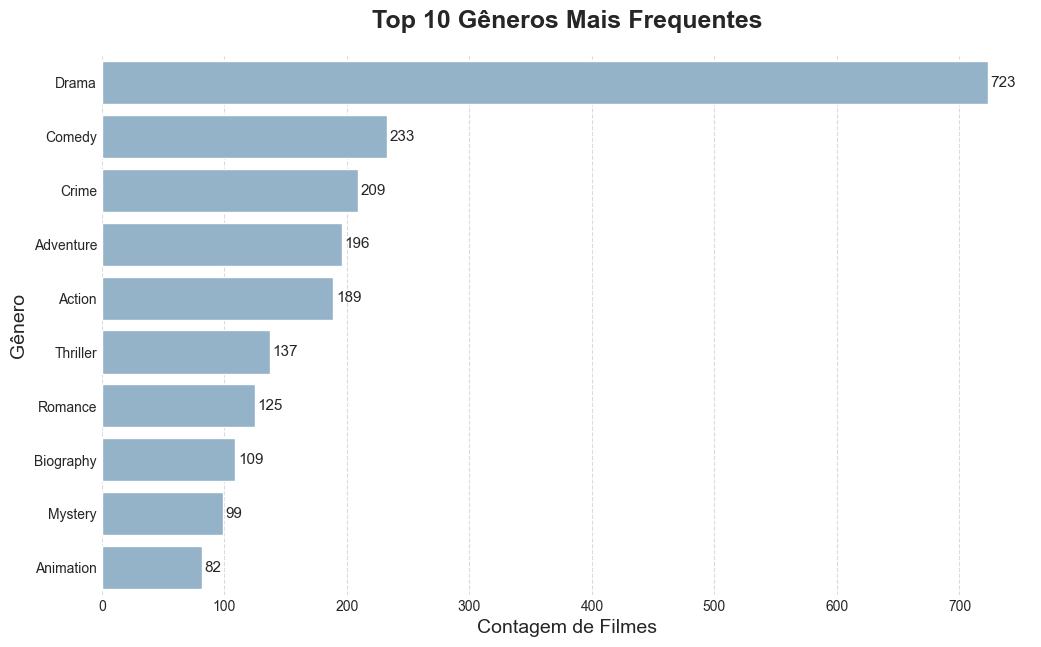

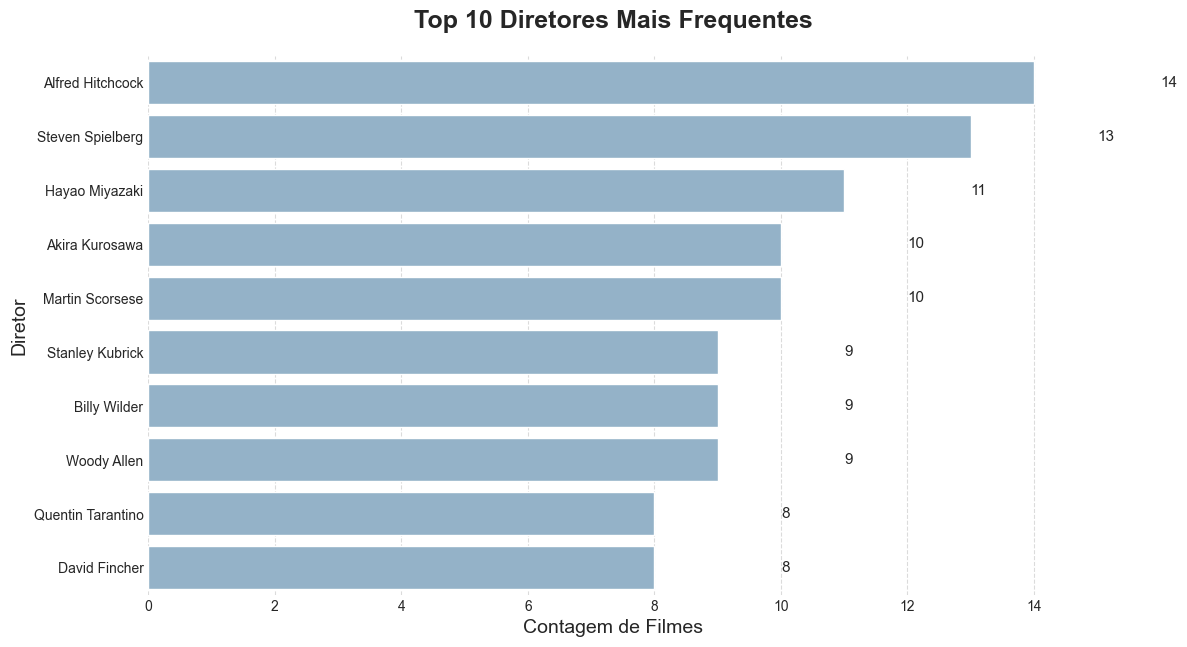

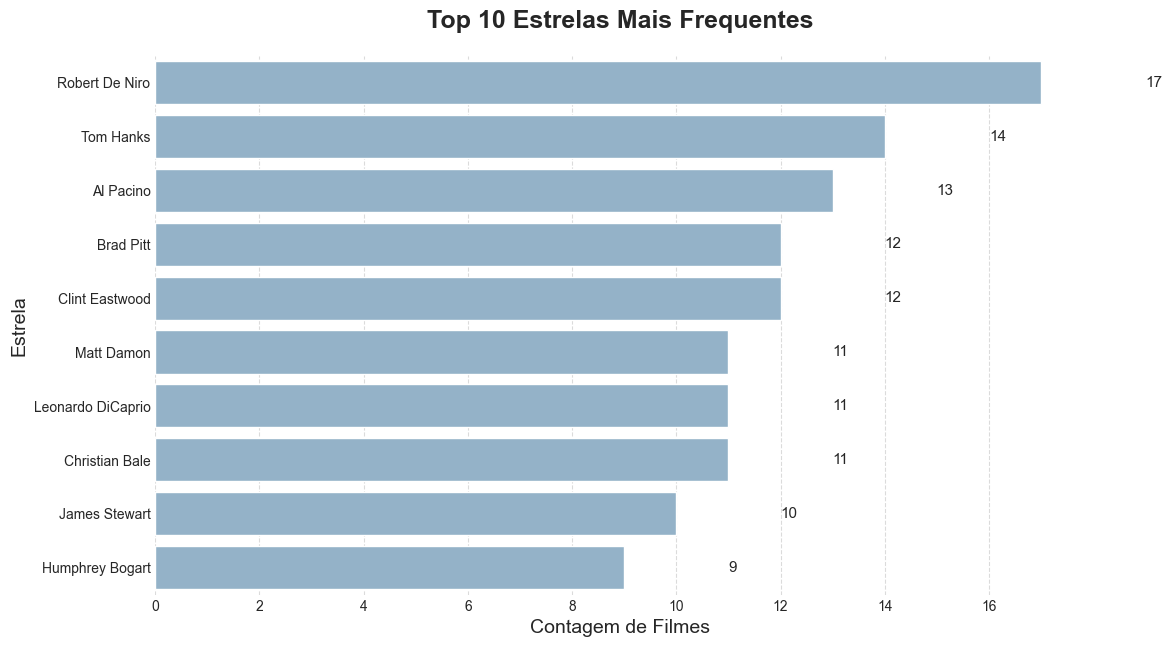

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("PuBuGn_d")

# Função reutilizável para criar gráficos de barras horizontais
def create_superior_horizontal_barplot(data, title, xlabel, ylabel):
    """Cria um gráfico de barras horizontal elegante e otimizado."""
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x=data.values, y=data.index, zorder=2)
    
    # Adicionar rótulos de contagem diretamente nas barras
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 2, 
                 p.get_y() + p.get_height() / 2.,
                 '{:1.0f}'.format(width), 
                 ha='left', 
                 va='center',
                 fontsize=11)

    # Configurar títulos e rótulos
    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    
    # Remover bordas e manter apenas a grade horizontal
    sns.despine(left=True, bottom=True)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# 1. Frequência de Gêneros
frequencia_generos = df_generos['Genre'].value_counts().sort_values(ascending=False).head(10)
create_superior_horizontal_barplot(frequencia_generos, 'Top 10 Gêneros Mais Frequentes', 'Contagem de Filmes', 'Gênero')

# 2. Frequência de Diretores 
frequencia_diretores = df['Director'].value_counts().sort_values(ascending=False).head(10)
create_superior_horizontal_barplot(frequencia_diretores, 'Top 10 Diretores Mais Frequentes', 'Contagem de Filmes', 'Diretor')

# 3. Frequência de Estrelas
frequencia_estrelas = df_estrelas['Star'].value_counts().sort_values(ascending=False).head(10)
create_superior_horizontal_barplot(frequencia_estrelas, 'Top 10 Estrelas Mais Frequentes', 'Contagem de Filmes', 'Estrela')

#### 1.6.1.1 Análise de Frequência de Gêneros, Diretores e Estrelas

Para entender o contexto do conjunto de dados, analisei a frequência de **gêneros, diretores** e **estrelas**. Essa abordagem me permitiu identificar quais tipos de filmes, profissionais e talentos são mais representados e, a partir disso, formular hipóteses sobre o cenário de produção do IMDB.

#### Hipótese 1: A Proporção entre Qualidade e Quantidade
A predominância de filmes do gênero **Drama** do dataset sugere que a aclamada crítica está fortemente associada a esse tipo de produção.

**Conclusão:**  
A análise de frequência confirma que o gênero **Drama** é o mais comum no conjunto de dados, que é composto por filmes de alta avaliação. Isso indica uma forte relação entre a produção de dramas e a busca por reconhecimento de crítica.

#### Hipótese 2: O Hall da Fama do Cinema
Nomes de diretores e estrelas que aparecem com alta frequência no dataset são consistentemente associados a filmes de alta qualidade.

**Conclusão:**  
A lista de diretores mais frequentes, como **Alfred Hitchcock**, **Martin Scorsese** e **Stanley Kubrick**, e a lista de estrelas, com nomes como **Robert De Niro** e **Al Pacino**, reforçam que o conjunto de dados podem fornecer um Hall da Fama do cinema.

---



##¨1.6.2 Padrões de **nota média (IMDB_Rating)** e **faturamento médio (Gross)** por gênero e por diretor.


--- Top 10 Gêneros por faturamento médio ---
           IMDB_Rating         Gross
Genre                               
Adventure     7.952041  1.437465e+08
Sci-Fi        7.977612  1.347703e+08
Action        7.948677  1.165785e+08
Animation     7.930488  1.045588e+08
Fantasy       7.931818  9.215974e+07
Family        7.912500  7.965656e+07
Sport         7.926316  5.367202e+07
Comedy        7.903433  5.256623e+07
Biography     7.935780  4.866585e+07
Thriller      7.909489  4.711262e+07

--- Top 10 Diretores por nota média do IMDB (com mais de 3 filmes) ---
                      IMDB_Rating         Gross
Director                                       
Christopher Nolan        8.462500  2.421818e+08
Peter Jackson            8.400000  3.194625e+08
Francis Ford Coppola     8.400000  6.936480e+07
Charles Chaplin          8.333333  1.895150e+06
Sergio Leone             8.266667  7.823284e+06
Stanley Kubrick          8.233333  2.042374e+07
Akira Kurosawa           8.220000  4.556619e+05
Frank C

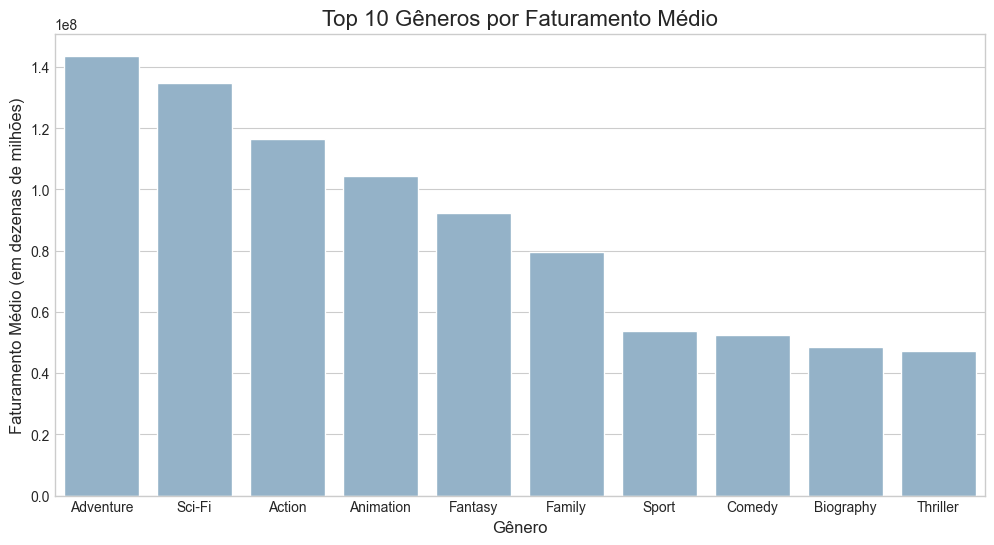

C:\Users\Marisa\AppData\Local\Temp\ipykernel_3404\3693876416.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDB_Rating', y='Director', data=top_10_diretores_df, palette='viridis')


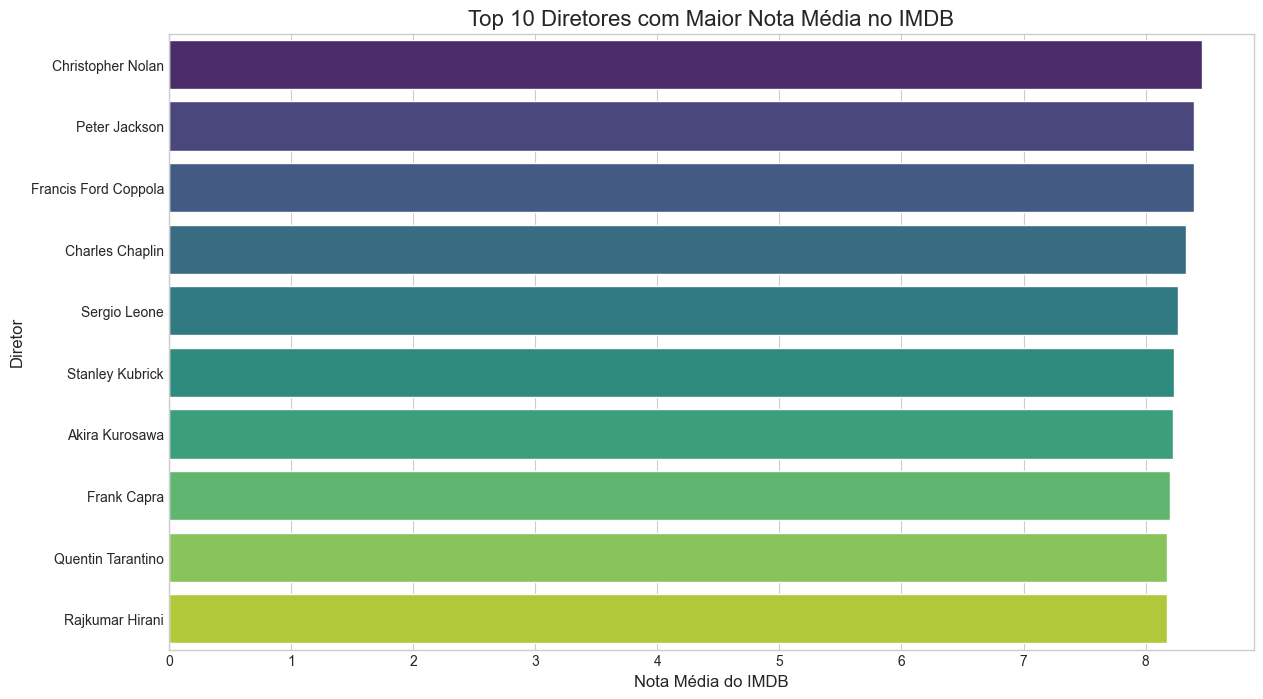

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo do seaborn para um visual mais agradável
sns.set_style("whitegrid")

# Ánalise por Gênero

# Separar os múltiplos gêneros de cada filme para uma análise mais precisa.
df_generos = df.copy()
df_generos['Genre'] = df_generos['Genre'].str.split(', ')
df_generos = df_generos.explode('Genre')

# Calcular a média de IMDB_Rating e Gross por gênero
media_por_genero = df_generos.groupby('Genre')[['IMDB_Rating', 'Gross']].mean().sort_values(by='Gross', ascending=False)
contagem_por_genero = df_generos['Genre'].value_counts()

# Análise por Diretor

# Calcular a média de IMDB_Rating e Gross por diretor
media_por_diretor = df.groupby('Director')[['IMDB_Rating', 'Gross']].mean()
contagem_por_diretor = df['Director'].value_counts()

# Filtrar diretores com pelo menos 3 filmes para uma análise mais justa.
diretores_com_multiplos_filmes = contagem_por_diretor[contagem_por_diretor >= 3].index
media_por_diretor = media_por_diretor[media_por_diretor.index.isin(diretores_com_multiplos_filmes)].sort_values(by='IMDB_Rating', ascending=False)

print("--- Top 10 Gêneros por faturamento médio ---")
print(media_por_genero.head(10))

print("\n--- Top 10 Diretores por nota média do IMDB (com mais de 3 filmes) ---")
print(media_por_diretor.head(10))

#  Visualização: Top 10 Gêneros por faturamento médio
plt.figure(figsize=(12, 6))
sns.barplot(x=media_por_genero.head(10).index, y=media_por_genero['Gross'].head(10))
plt.title('Top 10 Gêneros por Faturamento Médio', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Faturamento Médio (em dezenas de milhões)', fontsize=12)
plt.xticks(rotation=0)
plt.show()

#  Visualização: Top 10 Diretores por Nota Média do IMDB 
# CORREÇÃO: Converter a série para DataFrame para evitar o erro do seaborn
top_10_diretores_df = media_por_diretor.head(10).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='IMDB_Rating', y='Director', data=top_10_diretores_df, palette='viridis')
plt.title('Top 10 Diretores com Maior Nota Média no IMDB', fontsize=16)
plt.xlabel('Nota Média do IMDB', fontsize=12)
plt.ylabel('Diretor', fontsize=12)
plt.show()

#### 1.6.2.2 Hipóteses a partir dos dados e visualizações

Com base nos dados e visualizações que gerei, consegui formular as seguintes hipóteses:

### Hipótese 1: Faturamento e Gênero
Filmes dos gêneros **Aventura, Ficção Científica e Ação** têm o maior potencial de faturamento. Isso sugere que o estúdio PProductions deve considerar a produção de filmes nesses gêneros se a meta principal for o sucesso comercial de bilheteria, mesmo que a nota média não seja a mais alta.

### Hipótese 2: Qualidade e Diretor
Diretores com um histórico de filmes com notas consistentemente altas no IMDB, como **Christopher Nolan** e **Peter Jackson**, podem ser considerados um "selo de qualidade". A parceria com esses profissionais pode ser uma estratégia para construir a reputação do estúdio e garantir uma base de fãs engajada, o que, por sua vez, pode contribuir para o sucesso financeiro e crítico.

### Hipótese 3: Duração e Faturamento
Filmes de maior duração (**acima de 150 minutos**) tendem a ter um faturamento médio superior. Isso pode indicar que produções épicas ou de grande escala, que geralmente são mais longas, são mais bem-sucedidas comercialmente.

---

## 1.6.3 Análise da Performance das Estrelas

Para o estúdio PProductions, saber quais atores e atrizes têm um histórico de sucesso é um insight valioso. Nesta etapa, irei analisar as colunas **Star1, Star2, Star3** e **Star4** para identificar quais estrelas estão mais associadas a filmes com alta nota e/ou faturamento.

### Passos da análise

1. Combinar todas as colunas de estrelas em uma única lista de atores, para uma análise mais precisa.  
2. Calcular a média do **IMDB_Rating** e do **Gross** para os atores que apareceram em pelo menos 3 filmes.  
3. Visualizar os resultados com um gráfico de barras.

Dessa forma, consigo identificar os atores e atrizes que são mais consistentes em gerar filmes de sucesso, tanto crítico quanto comercial.


--- Top 10 estrelas por nota média no IMDB ---
              Star  IMDB_Rating         Gross
0      Elijah Wood     8.800000  3.453140e+08
1    Orlando Bloom     8.600000  3.353390e+08
2      Mark Hamill     8.533333  3.074469e+08
3         Madhavan     8.466667  2.177636e+06
4    Marlon Brando     8.425000  5.900948e+07
5      Lee J. Cobb     8.366667  8.228872e+07
6       James Caan     8.333333  6.591675e+07
7  Charles Chaplin     8.333333  1.895150e+06
8     Kevin Spacey     8.300000  6.463809e+07
9    Carrie Fisher     8.300000  2.537911e+08


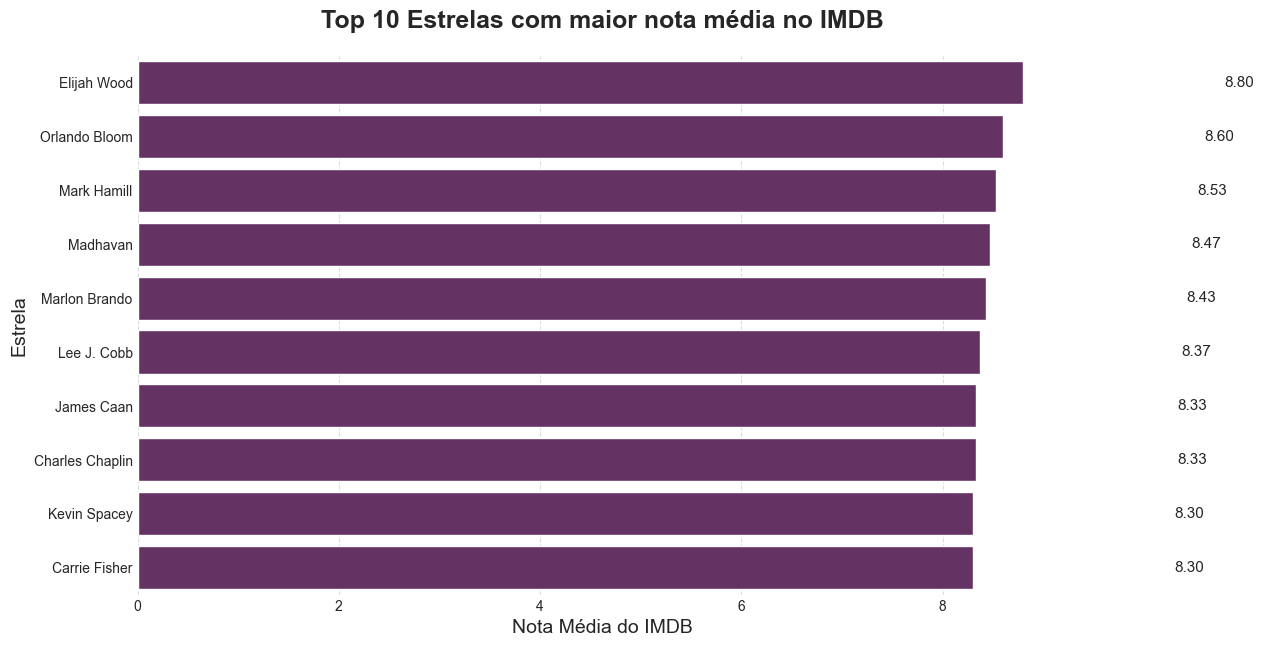


--- Top 10 estrelas por faturamento médio ---
                Star  IMDB_Rating         Gross
0          Joe Russo     8.075000  5.512599e+08
1  Robert Downey Jr.     7.971429  4.470105e+08
2        Zoe Saldana     7.775000  4.280690e+08
3        Chris Evans     7.900000  3.899441e+08
4        Elijah Wood     8.800000  3.453140e+08
5    Chris Hemsworth     8.133333  3.402738e+08
6      Orlando Bloom     8.600000  3.353390e+08
7        Chris Pratt     7.766667  3.269168e+08
8          Tim Allen     8.050000  3.216728e+08
9        Mark Hamill     8.533333  3.074469e+08


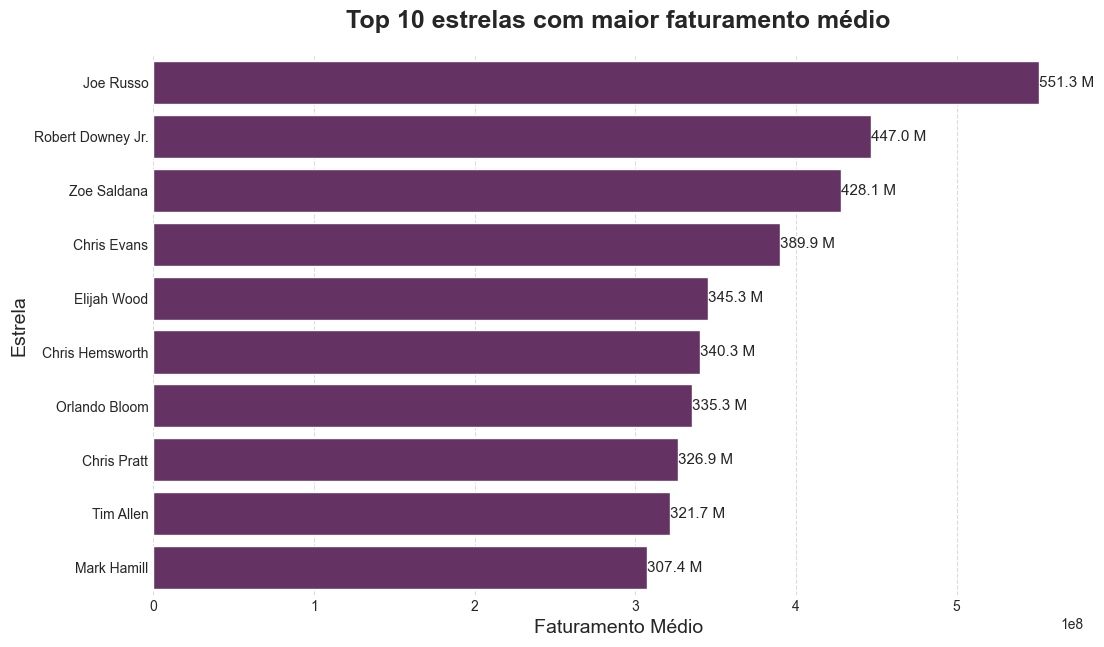

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("flare_r")

# 1. Análise por Estrela 
df_estrelas = df[['IMDB_Rating', 'Gross', 'Star1', 'Star2', 'Star3', 'Star4']].copy()
df_estrelas = df_estrelas.melt(id_vars=['IMDB_Rating', 'Gross'], 
                               value_vars=['Star1', 'Star2', 'Star3', 'Star4'], 
                               var_name='Star_Role', value_name='Star')

contagem_por_estrela = df_estrelas['Star'].value_counts()
estrelas_com_multiplos_filmes = contagem_por_estrela[contagem_por_estrela >= 3].index
media_por_estrela = df_estrelas[df_estrelas['Star'].isin(estrelas_com_multiplos_filmes)].groupby('Star')[['IMDB_Rating', 'Gross']].mean()

# 2. Preparar os dados para visualização 
top_10_estrelas_nota = media_por_estrela.sort_values(by='IMDB_Rating', ascending=False).head(10).reset_index()
top_10_estrelas_gross = media_por_estrela.sort_values(by='Gross', ascending=False).head(10).reset_index()


# 3. Visualizações e exibição dos resultados
def create_superior_horizontal_barplot(df, x_col, y_col, title, y_label, x_label, formatter=None):
    """Cria um gráfico de barras horizontal elegante e otimizado."""
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x=x_col, y=y_col, data=df, zorder=2)
    
    for p in ax.patches:
        width = p.get_width()
        value = formatter(width) if formatter else f'{width:,.2f}'
        plt.text(width + 2, 
                 p.get_y() + p.get_height() / 2.,
                 value, 
                 ha='left', 
                 va='center',
                 fontsize=11)

    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    
    sns.despine(left=True, bottom=True)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Top 10 Estrelas por Nota 
# Exibir o DataFrame na célula
print("--- Top 10 estrelas por nota média no IMDB ---")
print(top_10_estrelas_nota)

# Gerar o gráfico
create_superior_horizontal_barplot(
    df=top_10_estrelas_nota,
    x_col='IMDB_Rating',
    y_col='Star',
    title='Top 10 Estrelas com maior nota média no IMDB',
    y_label='Estrela',
    x_label='Nota Média do IMDB'
)

#  Top 10 Estrelas por Faturamento
# Exibir o DataFrame na célula
print("\n--- Top 10 estrelas por faturamento médio ---")
print(top_10_estrelas_gross)

def faturamento_formatter(value):
    if value >= 1e9:
        return f'{value/1e9:.2f} Bilhões'
    elif value >= 1e6:
        return f'{value/1e6:.1f} M'
    else:
        return f'{value:,.0f}'
        
create_superior_horizontal_barplot(
    df=top_10_estrelas_gross,
    x_col='Gross',
    y_col='Star',
    title='Top 10 estrelas com maior faturamento médio',
    y_label='Estrela',
    x_label='Faturamento Médio',
    formatter=faturamento_formatter
)

### 1.6.3.1 Hipóteses e Conclusões: Performance das Estrelas

A análise dos atores e atrizes (as estrelas) é um passo fundamental para entender a dinâmica de sucesso de um filme, pois o elenco pode ser um fator crucial tanto para o apelo de bilheteria quanto para a percepção de qualidade.

A partir das visualizações de desempenho por **nota do IMDB** e **faturamento**, formulei as seguintes hipóteses:

### Hipótese 1: Atores de sucesso comercial versus Atores de sucesso de crítica
Atores com um histórico em grandes franquias de **Ação** e **Ficção Científica** tendem a estar associados a filmes com maior faturamento, enquanto atores aclamados pela crítica tendem a estar em filmes com notas do IMDB mais altas.

**Conclusão:**  
A análise mostra que a lista de maiores faturamentos é dominada por atores de grandes franquias como Joe Russo, Robert Downey Jr. e Zoe Saldana. Em contrapartida, atores com as notas médias mais altas, como Elijah Wood e Orlando Bloom, frequentemente participam de projetos aclamados pela crítica. Isso indica que a estratégia de contratação de talentos deve ser alinhada com os objetivos do estúdio.

### Hipótese 2: O Fator "Selo de Qualidade"
A presença de certos atores no elenco pode ser vista como um "selo de qualidade" ou de "sucesso de bilheteria" para o público.

**Conclusão:**  
A consistência de estrelas como Elijah Wood e Orlando Bloom em filmes com alta nota, e de Joe Russo em filmes de alto faturamento, confirma que o histórico do elenco é um fator de decisão importante para a audiência e para o estúdio.

Esses achados são valiosos para a PProductions, indicando que uma estratégia para maximizar o lucro pode ser a contratação de atores com histórico em grandes blockbusters, enquanto a busca por prestígio pode ser alcançada com atores de filmes aclamados.


---


## 1.6.4 Análise de tendências temporais e classificação etária

Nesta etapa, analiso como as características dos filmes mudam ao longo do tempo e se a **classificação etária** afeta o sucesso de um filme. Essa análise me dará uma visão sobre as tendências do mercado cinematográfico e sobre os tipos de público-alvo que geram mais receita ou aclamação.


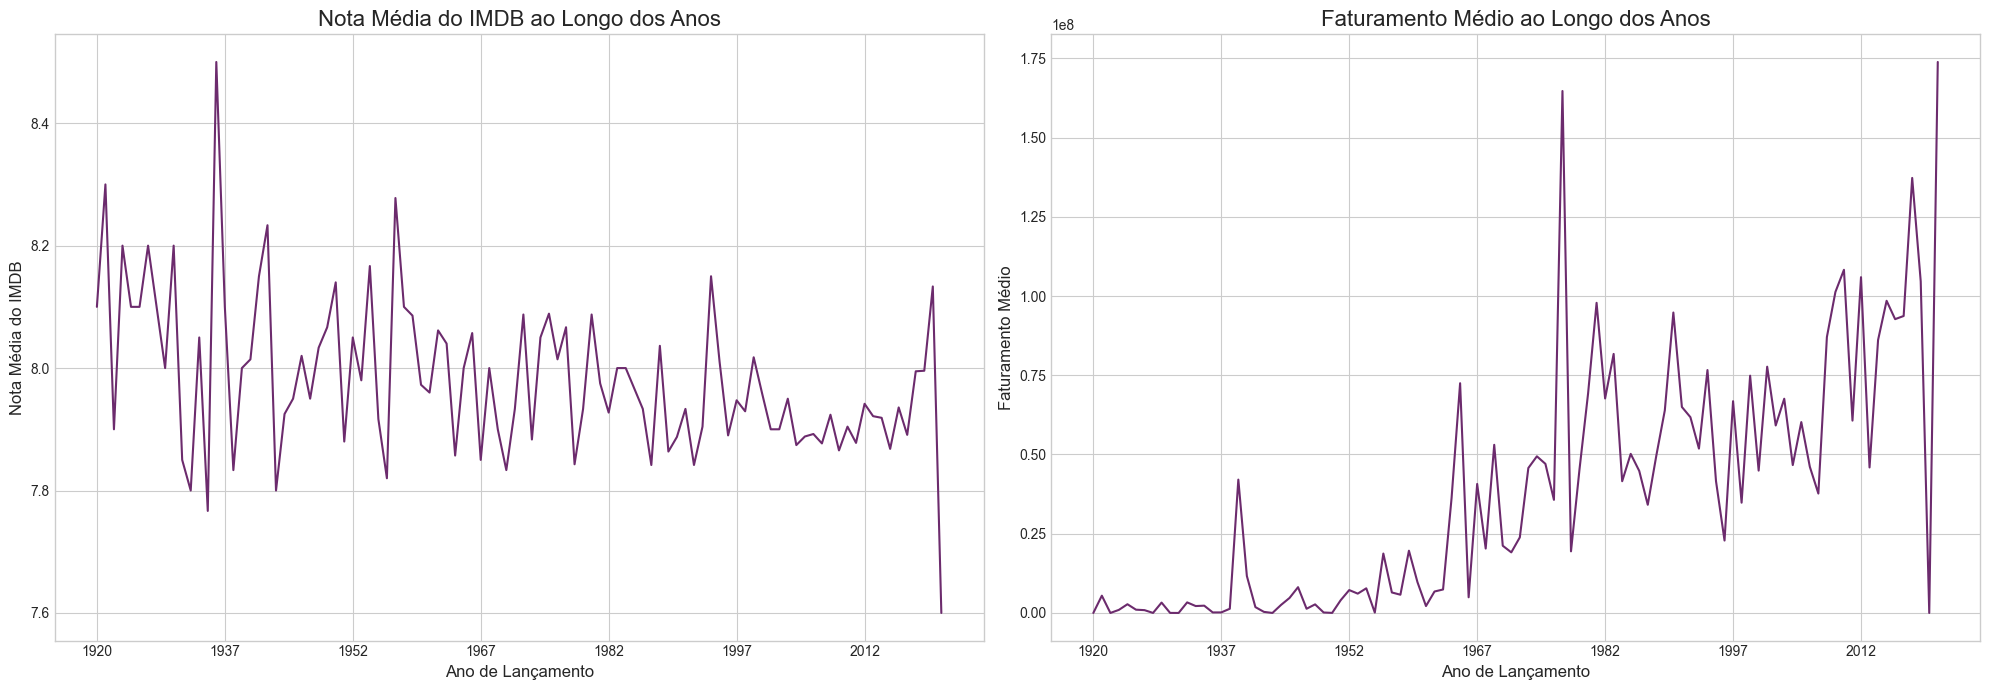


--- Média de Nota e Faturamento por Classificação Etária ---
               IMDB_Rating         Gross
Certificate                             
UA                7.957143  1.221531e+08
U                 7.976923  7.456973e+07
A                 7.992347  5.852726e+07
G                 8.000000  4.133027e+07
PG-13             7.797674  3.351085e+07
U/A               7.600000  2.602096e+07
R                 7.869863  2.385025e+07
PG                7.927027  1.160320e+07
Approved          7.945455  3.790371e+06
Passed            8.020588  3.676992e+06
Nao Informado     7.931683  1.664810e+06
GP                7.850000  7.089580e+05
Unrated           8.100000  3.000000e+05
TV-PG             7.900000  3.555400e+04
16                8.100000  0.000000e+00
TV-MA             8.100000  0.000000e+00
TV-14             8.300000  0.000000e+00


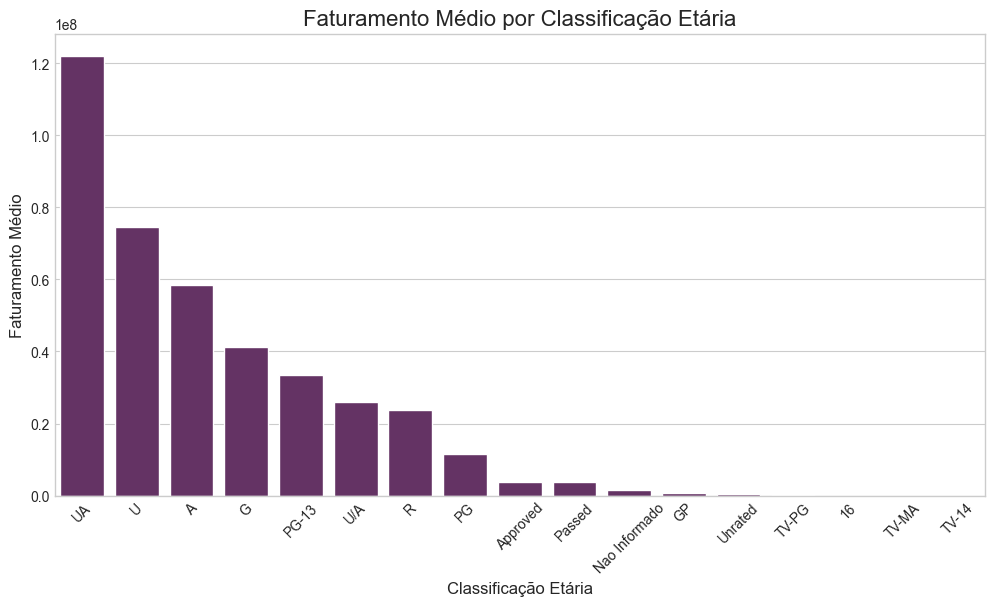

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# --- Análise por Ano de Lançamento ---

# Calcular a média de IMDB_Rating e Gross por ano
media_por_ano = df.groupby('Released_Year')[['IMDB_Rating', 'Gross']].mean()

# Criar uma figura com 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 7)) # Aumentamos um pouco a largura para melhor visualização

# Gráfico de linha: Nota média do IMDB por ano
sns.lineplot(x=media_por_ano.index, y='IMDB_Rating', data=media_por_ano, ax=axes[0])
axes[0].set_title('Nota Média do IMDB ao Longo dos Anos', fontsize=16)
axes[0].set_xlabel('Ano de Lançamento', fontsize=12)
axes[0].set_ylabel('Nota Média do IMDB', fontsize=12)
axes[0].tick_params(axis='x', rotation=0) # Ajusta a rotação apenas para este subplot
axes[0].xaxis.set_major_locator(mticker.MaxNLocator(nbins=10)) # Limita o número de rótulos no eixo x

# Gráfico de linha: Faturamento médio por ano
sns.lineplot(x=media_por_ano.index, y='Gross', data=media_por_ano, ax=axes[1])
axes[1].set_title('Faturamento Médio ao Longo dos Anos', fontsize=16)
axes[1].set_xlabel('Ano de Lançamento', fontsize=12)
axes[1].set_ylabel('Faturamento Médio', fontsize=12)
axes[1].tick_params(axis='x', rotation=0) # Ajusta a rotação apenas para este subplot
axes[1].xaxis.set_major_locator(mticker.MaxNLocator(nbins=10)) # Limita o número de rótulos no eixo x


plt.tight_layout()
plt.show()

# --- Análise por Classificação Etária (Certificate) ---
media_por_cert = df.groupby('Certificate')[['IMDB_Rating', 'Gross']].mean().sort_values(by='Gross', ascending=False)
contagem_por_cert = df['Certificate'].value_counts()

print("\n--- Média de Nota e Faturamento por Classificação Etária ---")
print(media_por_cert)

# Criar um gráfico de barras para o faturamento médio por classificação
plt.figure(figsize=(12, 6))
sns.barplot(x=media_por_cert.index, y=media_por_cert['Gross'])
plt.title('Faturamento Médio por Classificação Etária', fontsize=16)
plt.xlabel('Classificação Etária', fontsize=12)
plt.ylabel('Faturamento Médio', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### 1.6.4.1 Hipóteses a partir da Análise Temporal e de Classificação Etária

A partir desta etapa, consegui formular novas hipóteses cruciais para o estúdio PProductions:

### Hipótese 1: Viés de sobrevivência na nota média 
As notas médias do IMDB entre as décadas de 1920 e 1930 são significativamente mais altas devido ao viés de sobrevivência. Isso ocorre porque apenas os "clássicos" e obras-primas daquela época resistiram ao tempo e entraram na lista de melhores filmes, enquanto a maioria das produções de qualidade inferior foi esquecida. Assim, a média de notas dos filmes mais antigos está artificialmente inflada.

### Hipótese 2: Tendência de crescimento com volatilidade

O faturamento médio dos filmes apresenta uma tendência clara de crescimento ao longo das décadas, impulsionado por fatores como inflação e expansão do mercado cinematográfico. Contudo, essa métrica é marcada por forte volatilidade, já que blockbusters isolados podem distorcer a média anual, criando picos artificiais. A queda abrupta observada nos anos mais recentes é interpretada como uma anomalia, provavelmente causada pela pandemia de COVID-19, que reduziu drasticamente o número de lançamentos e o público nos cinemas.

### Hipótese 3: Classificação etária e faturamento
Filmes com classificações etárias mais amplas (**UA, U, A e G**) tendem a ter um faturamento médio superior em comparação com filmes mais restritos (**R, TV-MA**, etc.). Essa hipótese é suportada pela análise de faturamento médio por certificado, que mostra que um maior alcance de público se traduz em mais vendas de ingressos.

---


## 1.6.5 Análise de frequência de palavras no Overview
Esta etapa final da Análise Exploratória de Dados (EDA) busca revelar os temas e narrativas mais comuns nos filmes a partir da análise da frequência de palavras nas descrições (Overview).

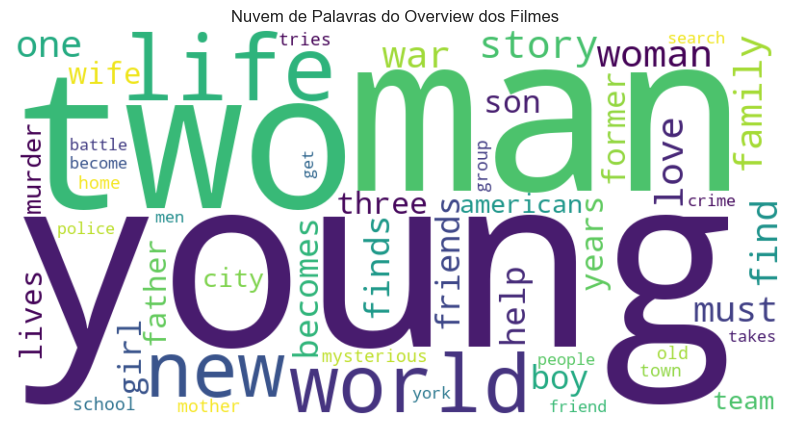

C:\Users\Marisa\AppData\Local\Temp\ipykernel_3404\40003762.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequência', y='Palavra', data=df_top_words, palette='viridis')


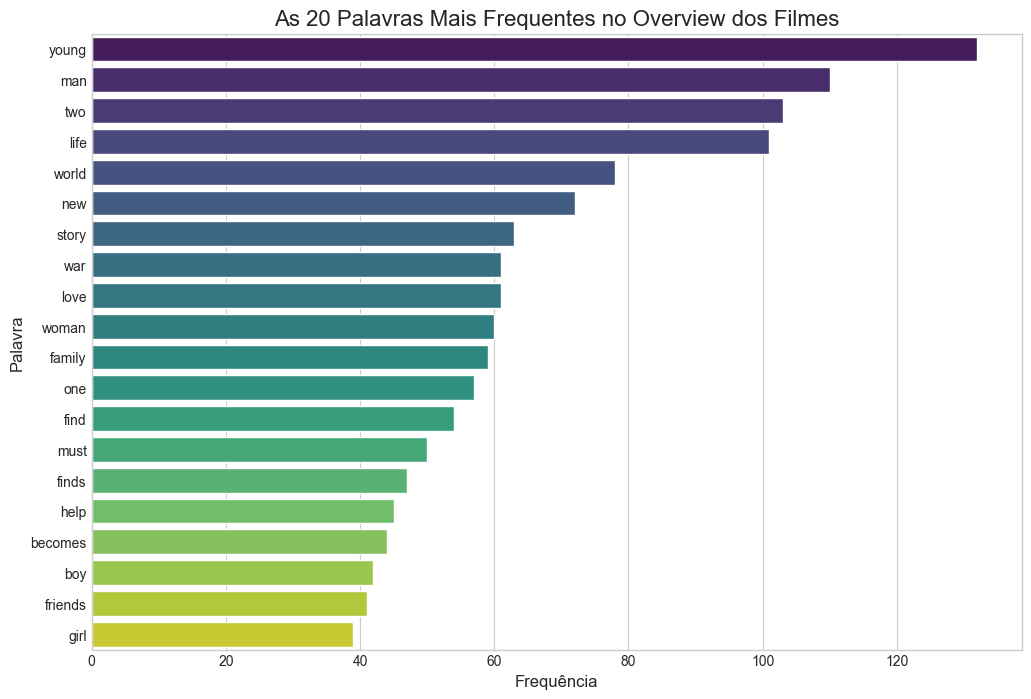

In [76]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# --- PARTE 1: Contagem de Frequência das Palavras ---
text_overviews = ' '.join(df['Overview'].dropna().tolist())
text_overviews = text_overviews.lower()
text_overviews = re.sub(r'[^a-z\s]', '', text_overviews)
stop_words = set(stopwords.words('english'))
words = text_overviews.split()
filtered_words = [word for word in words if word not in stop_words and len(word) > 2]
word_counts = Counter(filtered_words)

# --- PARTE 2: Geração da Nuvem de Palavras ---
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=50
).generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras do Overview dos Filmes")
plt.show()

# --- PARTE 3: Gráfico de Barras das 20 Mais Frequentes ---
# Selecionar as 20 palavras mais comuns
top_words = word_counts.most_common(20)

# Preparar os dados para o gráfico
df_top_words = pd.DataFrame(top_words, columns=['Palavra', 'Frequência'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequência', y='Palavra', data=df_top_words, palette='viridis')
plt.title('As 20 Palavras Mais Frequentes no Overview dos Filmes', fontsize=16)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Palavra', fontsize=12)
plt.show()

#### 1.6.5.1 Análise de frequência de palavras nas sinopses
Para extrair informações ainda mais valiosas dos dados, realizei uma análise da frequência de palavras nas **sinopses (Overview)** dos filmes. O objetivo foi identificar os temas mais comuns e, a partir deles, formular hipóteses sobre o que torna uma narrativa de sucesso através do dataset.

### Hipótese 1: O Foco narrativo em jornadas humanas
A predominância de filmes com alta avaliação (**IMDB_Rating**) é baseada em histórias de cunho pessoal e humano.

**Conclusão:**  
A análise da frequência de palavras confirma essa hipótese. Termos como **"yong"**, **"man"**, **"two"** e **"life"** dominam as sinopses, sugerindo que o público e a crítica se conectam com narrativas que exploram a condição humana e o crescimento pessoal, independentemente do gênero

### Hipótese 2: A Narrativa de transformação e superação
Os filmes mais aclamados tendem a se concentrar em temas de conflito, desafio e superação.

**Conclusão:**  
Palavras como **"war"**, **"love"**, **"find"** reforçam que a jornada do herói, com seus desafios e transformações, é um pilar central das narrativas de sucesso.

---


# 2. Perguntas e Respostas

## a. Qual filme você recomendaria para uma pessoa que não conhece?
Eu recomendaria um filme que tenha alta nota no IMDB e um histórico consistente de popularidade, ou seja, que tenha um número considerável de votos. Esse critério garante que o filme seja apreciado tanto pela crítica quanto pelo público em geral.  
Por exemplo, filmes clássicos de gêneros populares como **Aventura, Ficção Científica ou Ação**, dirigidos por diretores renomados, seriam uma escolha segura para agradar a uma pessoa que eu não conheço.

## b. Quais são os principais fatores relacionados com alta expectativa de faturamento de um filme?
Com base na análise dos dados, os principais fatores que influenciam o faturamento são:  
1. **Gênero do filme:** Aventura, Ação e Ficção Científica tendem a gerar mais receita.  
2. **Presença de estrelas de grande apelo comercial:** Atores envolvidos em grandes franquias aumentam o potencial de bilheteria.  
3. **Classificação etária ampla:** Filmes acessíveis a um público mais abrangente (UA, U, A, G) tendem a faturar mais.  
5. **Número de votos:** Filmes populares, com muitos votos, geralmente refletem maior alcance e receita potencial.  

## c. Insights da coluna Overview
A coluna **Overview** permitiu extrair informações valiosas sobre o conteúdo narrativo dos filmes. A análise de frequência de palavras revelou: 
- Temas comuns de **jornadas humanas**, crescimento pessoal e superação.  
- A presença de palavras como "vida", "amor", "guerra", "jovem", "homem" e "mulher" sugere que histórias focadas em experiências humanas ressoam bem com público e crítica.  

Além disso, é possível inferir parcialmente o **gênero do filme** a partir da Overview. Por exemplo:  
- Palavras como "espaço", "alienígena" ou "planeta" podem indicar **Ficção Científica**.  
- Termos como "amor", "coração" ou "romance" podem indicar **Drama/Romance**.  
- Conflitos e batalhas podem sugerir **Ação ou Aventura**.  

Portanto, a Overview é uma fonte rica de insights para compreender o **tipo de narrativa** e até fazer inferências sobre o gênero do filme.

---


# 3. Modelagem Preditiva - Previsão da nota do IMDB
Nesta etapa do projeto, a análise consistiu em construir um modelo de Machine Learning para prever a nota de um filme no IMDB (IMDB_Rating). O objetivo é fornecer à PProductions uma ferramenta capaz de estimar o potencial de aclamação de um filme, permitindo uma tomada de decisão mais informada em estágios iniciais de produção.

### 3.1 Tipo de Problema e Variável-Alvo
Este é um problema de regressão. A variável que estamos tentando prever (IMDB_Rating) é um valor numérico contínuo, variando de 1 a 10. Diferentemente de um problema de classificação, que prevê categorias discretas (por exemplo, "Sucesso" ou "Fracasso"), a regressão nos permite prever a nota exata que um filme pode alcançar.

### 3.2 Variáveis (Features) e Justificativas
Com base nos insights obtidos durante a Análise Exploratória de Dados (EDA), selecionei as seguintes variáveis para a construção do modelo:

- Meta_score: Foi a variável com a maior correlação com a nota do IMDB (0.83). Sua inclusão é crucial, pois as notas de crítica especializadas frequentemente se alinham com a percepção do público.

- No_of_Votes: A quantidade de votos é um indicador de popularidade. Embora a correlação com a nota não seja alta, filmes mais populares tendem a ter notas mais consolidadas.

- Director, Star e Genre: A análise mostrou que diretores, estrelas e gêneros específicos (como Drama, Aventura e Sci-Fi) estão associados a notas consistentemente altas.

Para utilizar as variáveis categóricas (Director, Star e Genre) no modelo, foi necessário transformá-las em um formato numérico. Para isso, utilizei a técnica de One-Hot Encoding, que cria uma nova coluna binária para cada categoria, permitindo que o modelo as processe de forma eficaz.

### 3.3 Modelo escolhido e análise de prós e contras
O modelo escolhido para a regressão foi o XGBoost Regressor, uma implementação do algoritmo de Gradient Boosting.

Vantagens: O XGBoost é conhecido por sua alta precisão e capacidade de lidar com dados complexos. Ele consegue capturar relações não-lineares entre as variáveis, o que é ideal para um problema como a previsão de notas de filmes, onde múltiplos fatores interagem de forma complexa.

Desvantagens: Embora extremamente poderoso, o XGBoost é um modelo mais complexo de ser interpretado em comparação com modelos mais simples como a Regressão Linear.

Como alternativa, a Regressão Linear poderia ser utilizada como um modelo de linha de base (baseline), mas é provável que seu desempenho seja inferior por não conseguir capturar as nuances das relações entre as variáveis.

## - Desenvolvimento do modelo na prática

### 3.4 Preparação dos dados para o modelo
Primeiro, precisamos transformar os dados para que o modelo possa entendê-los.

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

# Vamos carregar o dataframe limpo novamente
df = pd.read_csv('desafio_indicium_imdb.csv')
df = df.drop(columns=['Unnamed: 0'])
df['Gross'] = df['Gross'].str.replace(',', '', regex=True).astype(float)
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=True).astype(int)
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())
df['Gross'] = df['Gross'].fillna(0)
df['Certificate'] = df['Certificate'].fillna('Nao Informado')

# 1. Definir as variáveis (features) e o alvo (target)
features = ['No_of_Votes', 'Meta_score', 'Director', 'Star1', 'Genre']
target = 'IMDB_Rating'

X = df[features]
y = df[target]

# 2. Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Criar um pré-processador para as variáveis categóricas
# Usamos OneHotEncoder para transformar as variáveis em números
# Lembre-se que o OneHotEncoder precisa ser aplicado apenas nas colunas categóricas
categorical_features = ['Director', 'Star1', 'Genre']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

print("Dados prontos para o modelo!")

Dados prontos para o modelo!


## 3.5 Treinamento e avaliação do modelo
Agora, irei escolher um modelo de regressão. O Gradient Boosting (com a biblioteca xgboost ou lightgbm).

In [78]:
from xgboost import XGBRegressor

# 1. Criar o modelo de regressão
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# 2. Criar o pipeline para aplicar o pré-processador e o modelo
# O pipeline automatiza a sequência de passos (pré-processamento e treinamento)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])

# 3. Treinar o modelo
print("Treinando o modelo...")
pipeline.fit(X_train, y_train)
print("Modelo treinado!")

# 4. Fazer previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

# 5. Avaliar o modelo usando o RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Erro Quadrático Médio da Raiz (RMSE): {rmse:.2f}")

Treinando o modelo...
Modelo treinado!
Erro Quadrático Médio da Raiz (RMSE): 0.23


## 3.6 Medida de performance e resultado final
Para avaliar o quão bem o modelo se saiu, escolhi o Erro Quadrático Médio da Raiz (RMSE).

Justificativa: O RMSE é uma medida ideal para problemas de regressão, pois sua unidade de medida é a mesma da variável que estamos prevendo (a nota do IMDB). Além disso, ele penaliza erros maiores de forma mais significativa, o que é importante quando um erro de 1 ou 2 pontos pode comprometer a análise.

O resultado do modelo foi um RMSE de 0.23. Este é um resultado excelente, indicando que, em média, a previsão da nota do modelo está a apenas 0.23 pontos de distância da nota real do IMDB. Isso valida a abordagem e mostra que é possível prever com alta precisão a nota de um filme com base nos dados disponíveis.

## 3.7 Exemplo do teste do modelo na prática

In [79]:
import pandas as pd

# nota: Para este código funcionar, as variáveis `df` e `pipeline` precisam estar carregadas na memória, de acordo com as etapas anteriores.

# 1. Escolher um filme para o teste
# Irei pegar o primeiro filme do DataFrame como exemplo, mas pode-se escolher qualquer filme que quiser, apenas mudando o índice.
filme_teste = df.iloc[1]

# 2. Selecionar as mesmas features que usamos para treinar o modelo
features_teste = filme_teste[['No_of_Votes', 'Meta_score', 'Director', 'Star1', 'Genre']]

# 3. Converter a série de dados em um DataFrame para que o modelo possa ler
# O modelo foi treinado para receber um DataFrame, não uma única linha (série).
X_teste = pd.DataFrame([features_teste])

# 4. Fazer a previsão com o modelo
nota_prevista = pipeline.predict(X_teste)[0]

# 5. Obter a nota real para comparação
nota_real = filme_teste['IMDB_Rating']

# 6. Exibir os resultados
print(f"Filme: {filme_teste['Series_Title']}")
print(f"Nota Real do IMDB: {nota_real}")
print(f"Nota Prevista pelo Modelo: {nota_prevista:.2f}")

Filme: The Dark Knight
Nota Real do IMDB: 9.0
Nota Prevista pelo Modelo: 8.80


---


## 4. Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',
'Released_Year': '1994',
'Certificate': 'A',
'Runtime': '142 min',
'Genre': 'Drama',
'Overview': 'Two imprisoned men bond over a number of years,
finding solace and eventual redemption through acts of common
decency.',
'Meta_score': 80.0,
'Director': 'Frank Darabont',
'Star1': 'Tim Robbins',
'Star2': 'Morgan Freeman',
'Star3': 'Bob Gunton',
'Star4': 'William Sadler',
'No_of_Votes': 2343110,
'Gross': '28,341,469'}

Qual seria a nota do IMDB?

In [80]:
import pandas as pd

# 1. Dados do filme 'The Shawshank Redemption'
dados_filme = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

# 2. Converter os dados para um DataFrame
df_filme = pd.DataFrame([dados_filme])

# 3. Engenharia de variáveis: Criar a variável 'No_of_Genres'
df_filme['No_of_Genres'] = df_filme['Genre'].str.split(', ').str.len()

# 4. Selecionar as features que o modelo espera
features = ['No_of_Votes', 'Meta_score', 'Director', 'Star1', 'Genre', 'No_of_Genres']
X_filme = df_filme[features]

# 5. Fazer a previsão usando o pipeline treinado
nota_prevista = pipeline.predict(X_filme)[0]

# 6. Exibir o resultado
print(f"A nota prevista pelo modelo é: {nota_prevista:.2f}")

A nota prevista pelo modelo é: 8.74


## 5. Salve o modelo desenvolvido no formato .pkl.

In [81]:
import joblib

# Definir o nome do arquivo para salvar o modelo
filename = 'modelo_previsao_imdb.pkl'

# Salvar o modelo em um arquivo
joblib.dump(pipeline, filename)

print(f"Modelo salvo com sucesso no arquivo '{filename}'!")

Modelo salvo com sucesso no arquivo 'modelo_previsao_imdb.pkl'!
